In [1]:
# importing MNIST Dataset
from keras.datasets import mnist
# import plot, random for visual improvement
import matplotlib.pyplot as plt
import random

# import keras stuff
import numpy as np
import tensorflow as tf
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

Using TensorFlow backend.


In [2]:
# Load MNIST Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train.shape: {}, y_train.shape: {} \n x_test.shape: {}, y_test.shape: {}'
      .format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

x_train.shape: (60000, 28, 28), y_train.shape: (60000,) 
 x_test.shape: (10000, 28, 28), y_test.shape: (10000,)


Index: 26260, Number: 0
Index: 21805, Number: 8
Index: 47914, Number: 0
Index: 18505, Number: 0


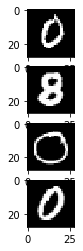

In [3]:
for i in range(0,4):
    k = 411+i
    plt.subplot(k)
    index = random.randrange(0, x_train.shape[0])
    plt.imshow(x_train[index], cmap=plt.get_cmap('gray'))
    print('Index: {}, Number: {}'.format(index, y_train[index]))

In [4]:
# Reshape 
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape((x_train.shape[0], num_pixels)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], num_pixels)).astype('float32')
x_train = x_train/255
x_test = x_test/255
# One hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [5]:
# create model
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
#model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test)
scores

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
 - 8s - loss: 0.3142 - accuracy: 0.9084 - val_loss: 0.1435 - val_accuracy: 0.9582
Epoch 2/2
 - 5s - loss: 0.1327 - accuracy: 0.9607 - val_loss: 0.0955 - val_accuracy: 0.9715
10000/10000 [==============================] - 1s 136us/step


[0.09553671193532645, 0.9714999794960022]